In [1]:

import yfinance as yf
# Get the data for nestleindia
ticker = "NESTLEIND.NS"

# Download the data
data = yf.download(ticker, start="2021-07-23", end="2024-07-23")

[*********************100%%**********************]  1 of 1 completed


In [2]:

data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [3]:
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna() # Volatility


In [4]:

pip install arch

   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   - -------------------------------------- 41.0/924.9 kB ? eta -:--:--
   - -------------------------------------- 41.0/924.9 kB ? eta -:--:--
   ---- --------------------------------- 112.6/924.9 kB 939.4 kB/s eta 0:00:01
   ---- --------------------------------- 112.6/924.9 kB 939.4 kB/s eta 0:00:01
   ---- --------------------------------- 112.6/924.9 kB 939.4 kB/s eta 0:00:01
   ------- ------------------------------ 174.1/924.9 kB 700.2 kB/s eta 0:00:02
   -------------- ------------------------- 327.7/924.9 kB 1.1 MB/s eta 0:00:01
   ------------------ --------------------- 419.8/924.9 kB 1.2 MB/s eta 0:00:01
   ------------------ --------------------- 419.8/924.9 kB 1.2 MB/s eta 0:00:01
   ------------------ --------------------- 419.8/924.9 kB 1.2 MB/s eta 0:00:01
   ---------------------- ----------------- 522.2/924.9 kB 1.2 MB/s eta 0:

In [5]:
from arch import arch_model

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data['Returns'] = data['Adj Close'].pct_change()

In [8]:
returns = data['Returns'].dropna()

In [9]:
returns = returns[np.isfinite(returns)]

In [10]:

#Fit an ARCH model to the cleaned returns
model = arch_model(returns, vol='ARCH', p=1)
fitted_model = model.fit()

#Print the summary of the fitted model
print(fitted_model.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 272554701.50052226
Iteration:      2,   Func. Count:     16,   Neg. LLF: -1762.2890969032285
Iteration:      3,   Func. Count:     24,   Neg. LLF: -2228.2537134929535
Iteration:      4,   Func. Count:     30,   Neg. LLF: -2237.540025033708
Iteration:      5,   Func. Count:     34,   Neg. LLF: -2237.5400109012157
Iteration:      6,   Func. Count:     38,   Neg. LLF: -2237.5400275115426
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2237.54002751131
            Iterations: 6
            Function evaluations: 38
            Gradient evaluations: 6
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                2237.54
Distribution:                  Norm

D:\Newfolder3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001393. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


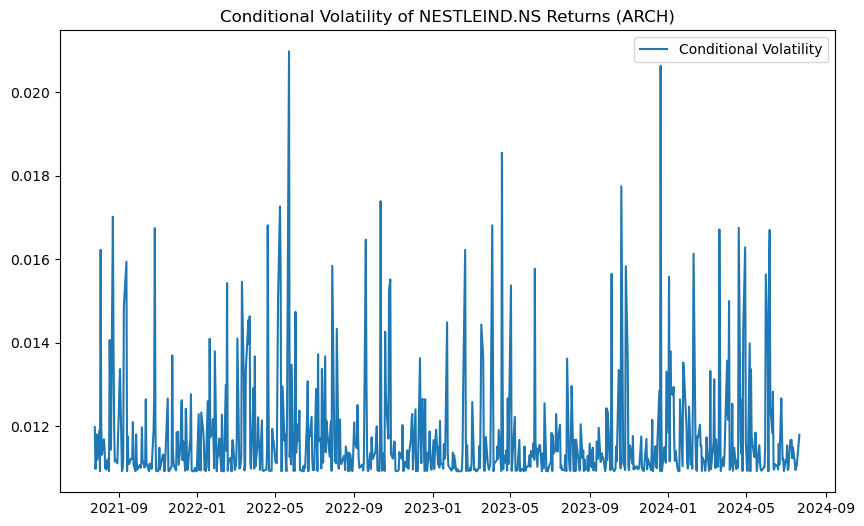

In [11]:
#Plot the fitted model's conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(fitted_model.conditional_volatility, label='Conditional Volatility')
plt.title(f'Conditional Volatility of {ticker} Returns (ARCH)')
plt.legend()
plt.show()

In [12]:
# Fit a GARCH model to the cleaned returns
# 'vol' parameter is set to 'GARCH' to specify a GARCH model
# 'p' parameter specifies the lag order of the autoregressive component
# 'q' parameter specifies the lag order of the moving average component
model = arch_model(returns, vol='Garch', p=1, q=1)
fitted_model = model.fit()

# Print the summary of the fitted model
print(fitted_model.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 28294360.34302363
Iteration:      2,   Func. Count:     18,   Neg. LLF: -1876.4409307518767
Iteration:      3,   Func. Count:     26,   Neg. LLF: 310696182.3966135
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2235.6099654085438
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2235.6099655607445
            Iterations: 8
            Function evaluations: 37
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2235.61
Distribution:                  Normal   AIC:                          -4463.22
Method:            Maximum Likelihood   BIC:                          -4444.80
                         

D:\Newfolder3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001393. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


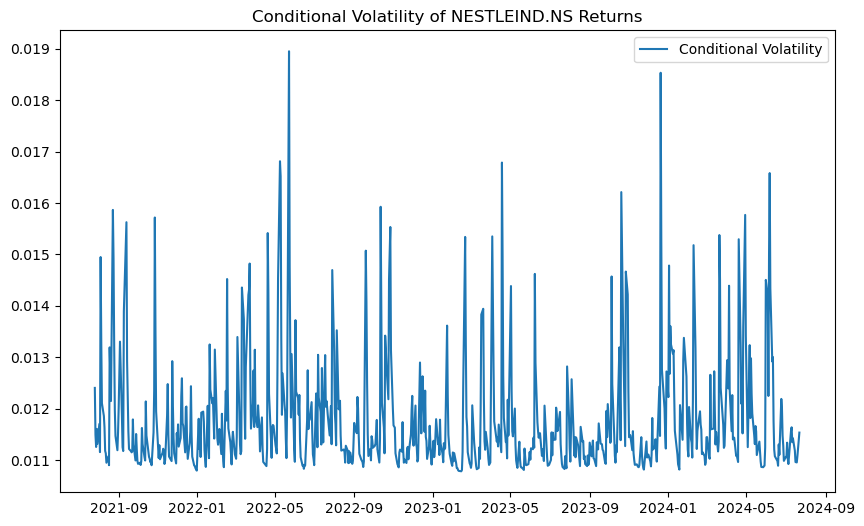

In [13]:
#Plot the fitted model's conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(fitted_model.conditional_volatility, label='Conditional Volatility')
plt.title(f'Conditional Volatility of {ticker} Returns')
plt.legend()
plt.show()

In [14]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2235.6099655607445
            Iterations: 8
            Function evaluations: 37
            Gradient evaluations: 4


D:\Newfolder3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001393. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [15]:

forecasts = res.forecast()

In [16]:
type(forecasts)

arch.univariate.base.ARCHModelForecast